In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

(512, 512)


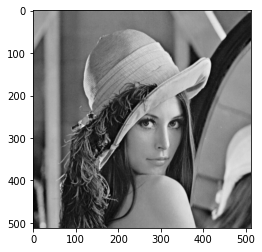

In [2]:
img = cv2.imread('Lenna.png',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img.shape)

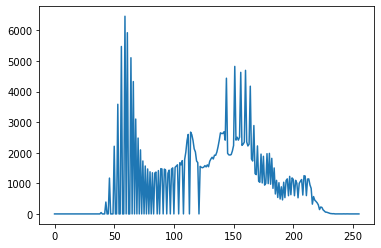

In [3]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [4]:
freq_arr=np.zeros(256,'uint64')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        freq_arr[img[i][j]]=freq_arr[img[i][j]]+1

sum1=img.shape[0]*img.shape[1]
print(freq_arr)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   45    0    0
    0  388    0    0 1171    0    0    0 2211    0    0 3583    0    0
 5472    0    0 6460    0 5922    0    0 5104    0 4325    0 3100    0
 2479    0 2093    0 1730    0 1566    0 1469    0 1377    0 1345    0
 1335 1367    0 1416    0 1479 1468    0 1465 1438    0 1328 1431    0
 1465 1504    0 1522 1564 1605    0 1674 1604 1741    0 1774 2021 2398
 2598    0 2673 2588 2403 2126 2027 1730 1676    0 1554 1522 1510 1529
 1579 1536 1603 1542 1719 1795 1851 1796 1919 1916 2022 2198 2409 2650
 2626 2629 2685 2411 4435 1980 1930 1925 1939 2058 2237 4821 2411 2506
 2411 2507 4627 2240 2277 2346 4692 2352 2221 2278 4174 1798 1729 2888
 1316 1285 2222 1066 1035 1955 1012 1883  941  998 1969  990 1979  971
 1816  836 1502  651 1097  538 1020  487  886  458 1036  532 1093 1145
  595 

In [5]:
def backgroung(threshold):
    tot=tot1=tot3=Vb=Wb=Mb=0
    for i in range(threshold):
        tot=tot+freq_arr[i]
    Wb=tot/sum1
    if Wb==0:
        return 0,0,0
    for i in range(threshold):
        tot1=tot1+ i*freq_arr[i]
    Mb=tot1/tot
    for i in range(threshold):
        tot3=tot3+ (i-Mb)*(i-Mb)*freq_arr[i]
    Vb=tot3/tot
    return Wb,Mb,Vb


In [6]:
def foregroung(threshold):
    tot=tot1=tot3=Vf=Wf=Mf=0
    for i in range(threshold,256):
        tot=tot+freq_arr[i]
    Wf=tot/sum1
    if Wf==0:
        return 0,0,0
    for i in range(threshold,256):
        tot1=tot1+ i*freq_arr[i]
    Mf=tot1/tot
    for i in range(threshold,256):
        tot3=tot3+ (i-Mf)*(i-Mf)*freq_arr[i]
    Vf=tot3/tot
    return Wf,Mf,Vf


In [7]:
Within_Class_Variance=np.zeros(256,'float64')
Between_Class_Variance=np.zeros(256,'float64')
for i in range (256):
    values_f=[]
    values_b=[]
    wf,mf,vf=foregroung(i)
    wb,mb,vb=backgroung(i)
    Within_Class_Variance[i]=wf*vf + wb*vb
    Between_Class_Variance[i]=wf*wb * (mf-mb)*(mf-mb)
    values_f.clear()

# print(Between_Class_Variance)

In [8]:
print(np.argmin(Within_Class_Variance))
threshold_value=np.argmin(Within_Class_Variance)
print(np.argmax(Between_Class_Variance))
threshold_value_1=np.argmax(Between_Class_Variance)

125
125


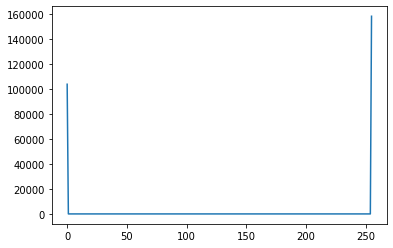

In [9]:
new_img=np.zeros(img.shape,'uint16')
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j]<threshold_value:
            new_img[i][j]=0
        else:
            new_img[i][j]=255

hist = cv2.calcHist([new_img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

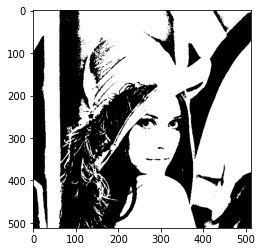

In [10]:
plt.imshow(new_img,'gray')